# LIBRARIES

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# link that helped 
https://towardsdatascience.com/pca-with-numpy-58917c1d0391

# Dataset

In [23]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",
                'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
# TAKE THE DATA FROM JSON
with open('../Simulation/data_pos_sim.json') as f:
    data_dict = json.load(f)

data_list = [data['LF'],data['RF']]
data_array = np.transpose(np.array(angles))
# DATA FRAME PANDAS
angle_df = pd.DataFrame(data=data_array,columns = ['angleLF','angleRF']) 
angle_df.dropna(how='all', inplace=True)
angle_df.head()


,angleLF,angleRF
0,73.060567,89.0
1,72.502128,88.0
2,71.935614,87.0
3,71.361467,86.0
4,70.780101,85.0


# Visualizing Data

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

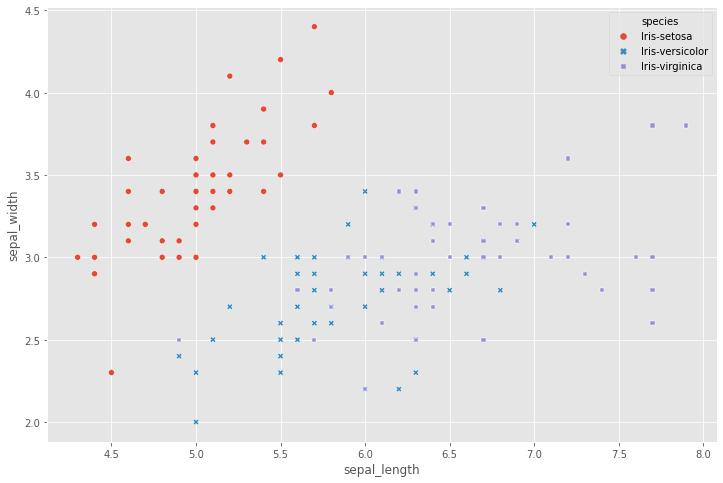

In [32]:
# Plotting data using seaborn
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

<AxesSubplot:xlabel='angleLF', ylabel='angleRF'>

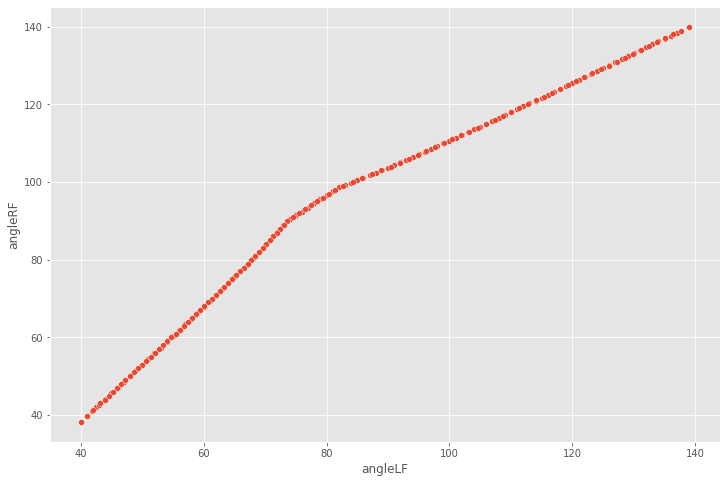

In [33]:
# Plotting data using seaborn
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = angle_df.angleLF, y=angle_df.angleRF)

# Standardizing the Data

In [34]:
def standardize_data(arr): 
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

$z = \frac{x_i - \mu(x)}{\sigma(x)}$

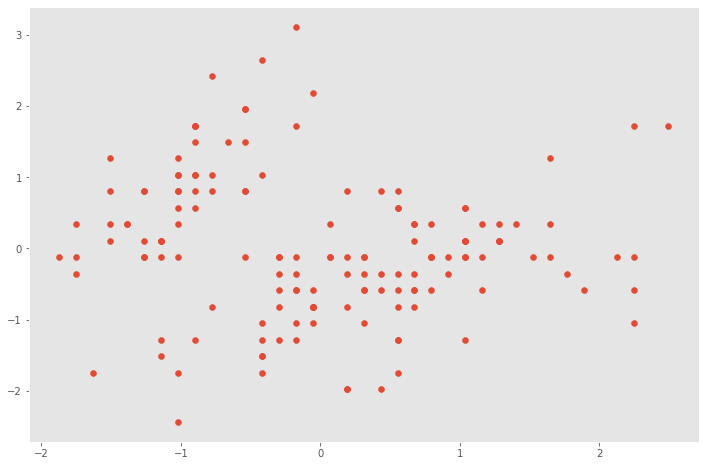

In [70]:
# Standardizing data
X = iris.iloc[:, 0:4].values
y = iris.species.values
X = standardize_data(X)

test = X.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test[0],test[1])
plt.grid()
plt.show()


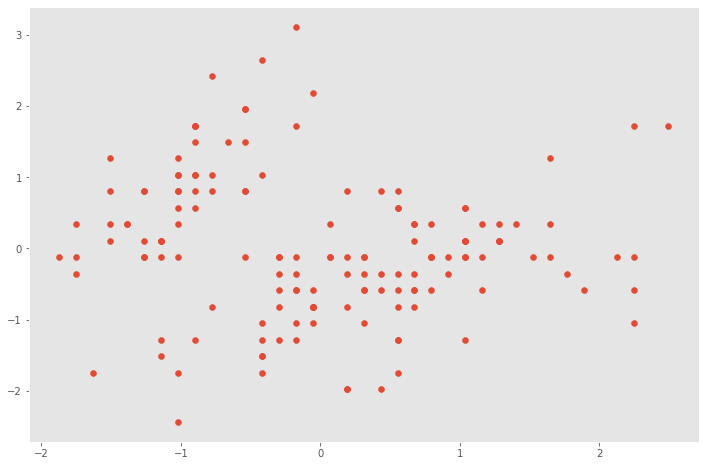

In [73]:
# Standardizing data
angle_std = angle_df.iloc[:, 0:2].values
#y = iris.species.values
angle_std = standardize_data(X)

test = angle_std.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test[0],test[1])
plt.grid()
plt.show()

# Computing the Eigenvectors and Eigenvalues
### Calculating the covariance matrix

In [74]:
covariance_matrix = np.cov(X.T)
print(covariance_matrix)

covariance_matrix2 = np.cov(angle_std.T)
print(covariance_matrix2)

# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


# PRINCIPLE COMPONENT ANALYSIS (PCA)

2


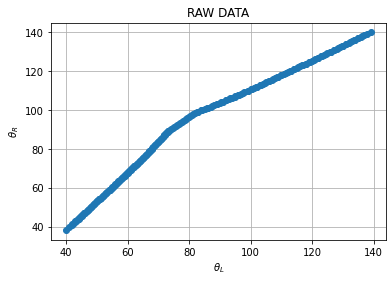

In [20]:
# TAKE THE DATA FROM JSON
with open('../Simulation/data_pos_sim.json') as f:
    data = json.load(f)

angles = [data['LF'],data['RF']]
angles = np.array(angles)



# PLOT RAW DATA
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(angles[0], angles[1], marker='o')
plt.title("RAW DATA")
plt.ylabel(r'$\theta_R$')
plt.xlabel(r'$\theta_L$')
plt.grid()
#plt.show()
#plt.savefig(file)


# TEST

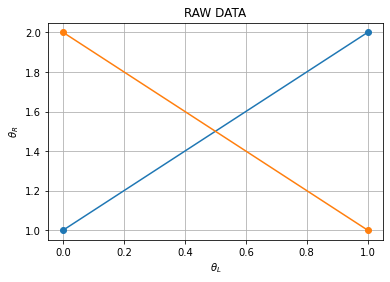

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([[1,2],[2,1]], marker='o')
plt.title("RAW DATA")
plt.ylabel(r'$\theta_R$')
plt.xlabel(r'$\theta_L$')
plt.grid()
plt.show()